In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("/content/CO2Emissions_Canada.csv")

data.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [ ]:
data.dtypes

,0
Make,object
Model,object
Vehicle Class,object
Engine Size(L),float64
Cylinders,int64
Transmission,object
Fuel Type,object
Fuel Consumption City (L/100 km),float64
Fuel Consumption Hwy (L/100 km),float64
Fuel Consumption Comb (L/100 km),float64


The dataset contains 5 object columns, 3 int column and 4 float columns

In [ ]:
data.isnull().sum()

,0
Make,0
Model,0
Vehicle Class,0
Engine Size(L),0
Cylinders,0
Transmission,0
Fuel Type,0
Fuel Consumption City (L/100 km),0
Fuel Consumption Hwy (L/100 km),0
Fuel Consumption Comb (L/100 km),0


 There are no missing values present in this dataset.

In [ ]:
duplicate = data.duplicated().sum()
print('There are {} duplicated rows in the data'.format(duplicate))

There are 1103 duplicated rows in the data


In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.reset_index(inplace=True, drop=True)

In [ ]:
data.shape

(6282, 12)

Now,The dataset has 6282 records and 12 features with no missing and duplicate values.

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine Size(L),6282.0,3.161812,1.365201,0.9,2.0,3.0,3.7,8.4
Cylinders,6282.0,5.618911,1.846250,3.0,4.0,6.0,6.0,16.0
Fuel Consumption City (L/100 km),6282.0,12.610220,3.553066,4.2,10.1,12.1,14.7,30.6
Fuel Consumption Hwy (L/100 km),6282.0,9.070583,2.278884,4.0,7.5,8.7,10.3,20.6
Fuel Consumption Comb (L/100 km),6282.0,11.017876,2.946876,4.1,8.9,10.6,12.7,26.1
Fuel Consumption Comb (mpg),6282.0,27.411016,7.245318,11.0,22.0,27.0,32.0,69.0
CO2 Emissions(g/km),6282.0,251.157752,59.290426,96.0,208.0,246.0,289.0,522.0


1. The average amount of CO2 emitted from cars is 251 g/km
2. Atleast 4 Litres of fuel is consumed be it the car is on
   city roads or highway
3. About 75% of the cars have 6 or less cylinders
4. The amount of fuel consumed by cars on city roads is comparitvely greater than that of highway





In [ ]:
data.describe(include = object)

,Make,Model,Vehicle Class,Transmission,Fuel Type
count,6282,6282,6282,6282,6282
unique,42,2053,16,27,5
top,FORD,F-150 FFV,SUV - SMALL,AS6,X
freq,577,32,1006,1139,3039


1. There are a total of 42 different car companies with 2053
different car models

2. Vehicles are divided into 16 different classes with SUV-Small vehicles frequenting the most
3. 5 different types of fuels used by cars have been identified and fuel X seems to be the most famous
4. Most of the cars have AS6 transmission

# **Visualization**



**1.Categorical Variables**



In [ ]:
data_cat_features = data.select_dtypes(include='object')
data_cat_features1 = data_cat_features[['Vehicle Class', 'Transmission', 'Fuel Type', 'Model','Make']]

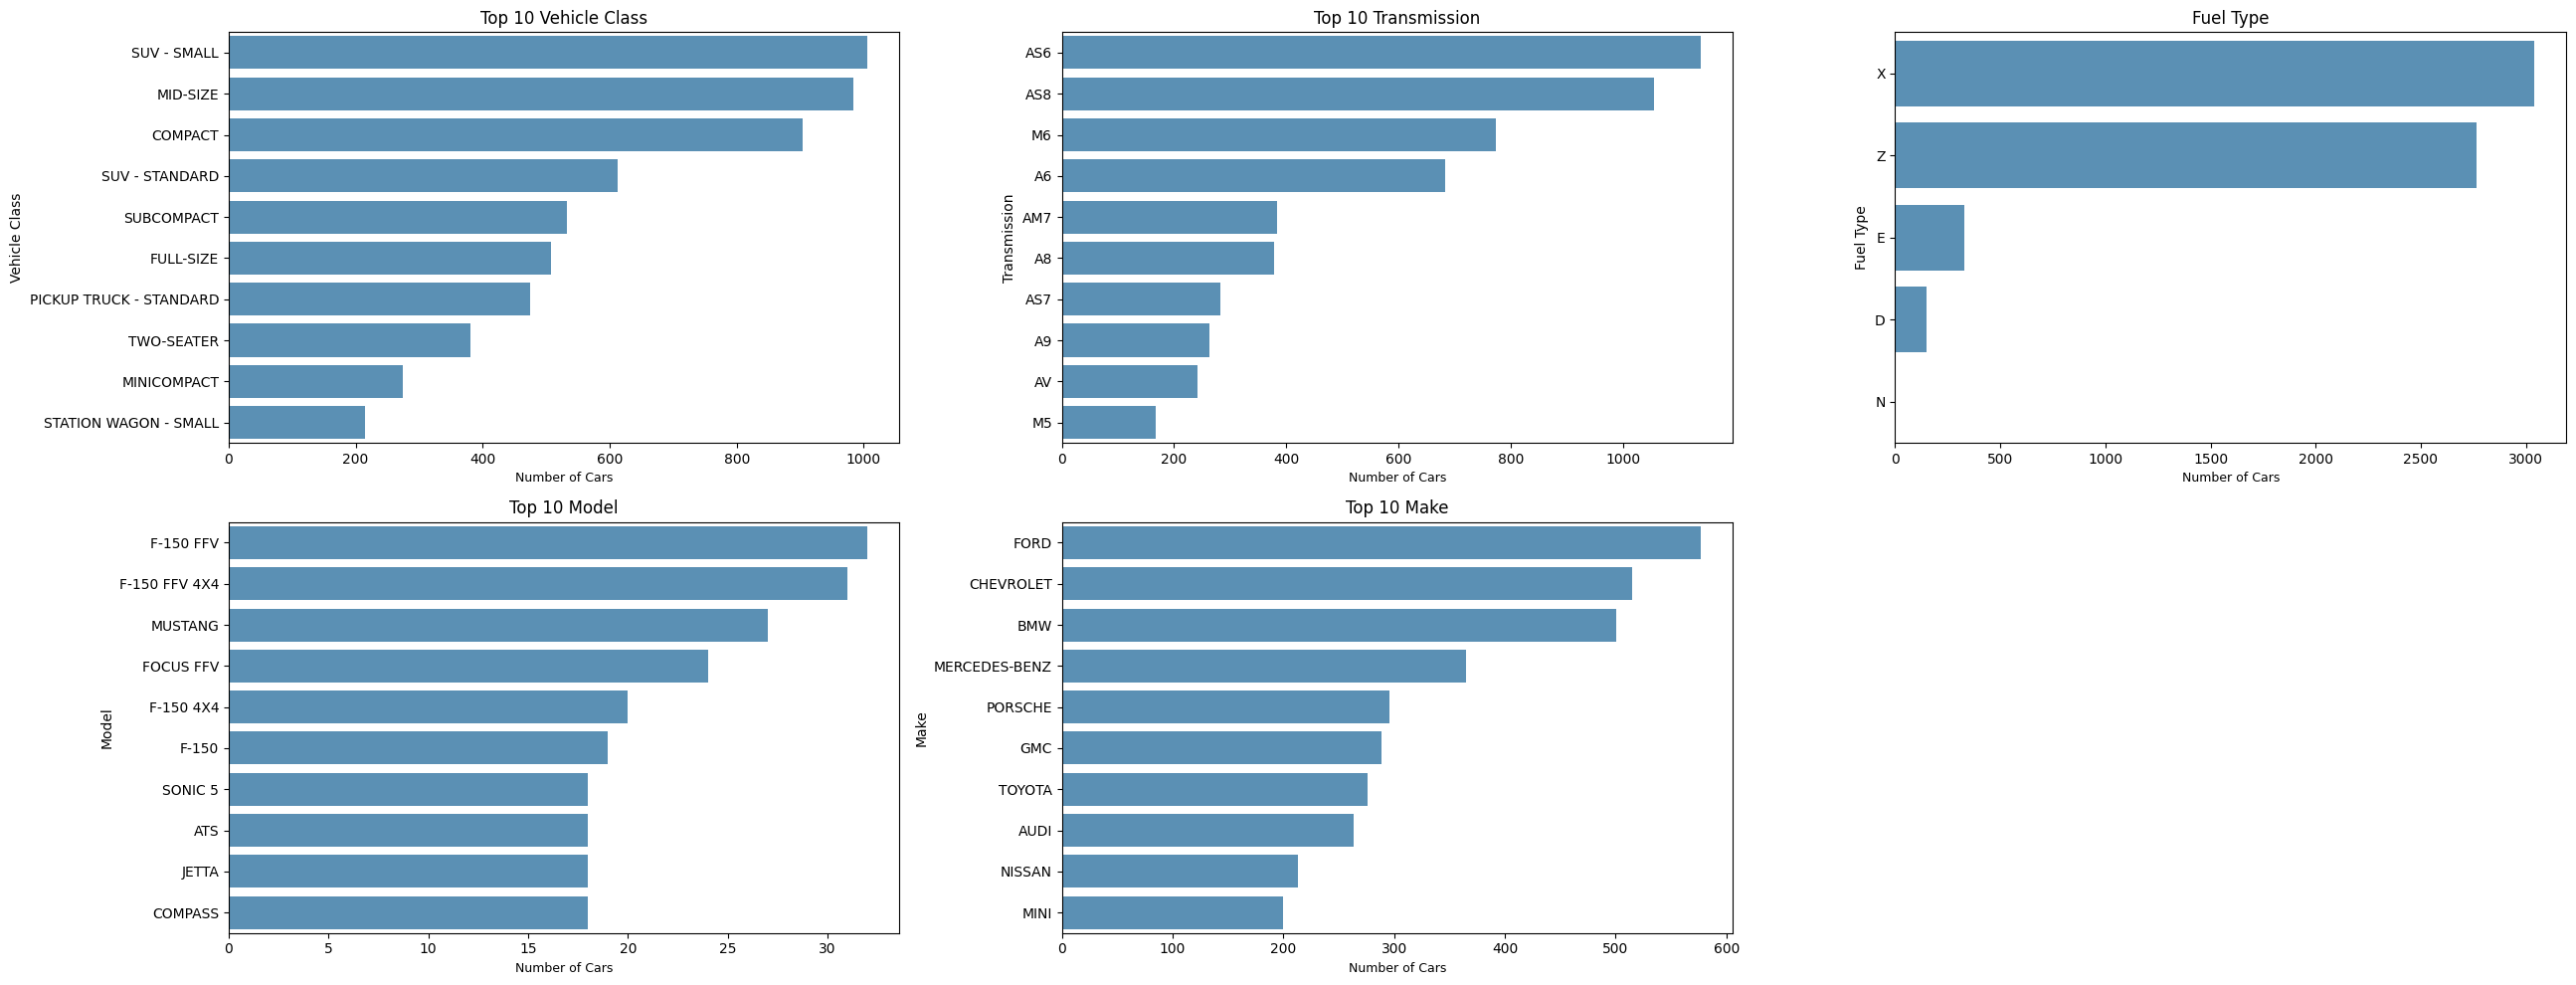

In [ ]:
# Assuming data_cat_features1 contains the categorical columns you want to plot.
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(26, 10))

for variable, subplot in zip(data_cat_features1.columns, ax.flatten()):
    cat_count = data[variable].value_counts()
    cat_count10 = cat_count[:10]

    # Corrected line with keyword arguments
    z = sns.barplot(x=cat_count10.values, y=cat_count10.index, alpha=0.8, ax=subplot)

    if cat_count.size > 10:
        z.set_title('Top 10 {}'.format(variable))
    else:
        z.set_title(variable)

    z.set_xlabel('Number of Cars', fontsize=9)

# Remove the extra subplot if not needed
fig.delaxes(ax[1][2])

plt.tight_layout()
plt.show()


1. Top 10 Make: Most of the cars on Canadian roads are made by Ford
2. Top 10 Model: The F-150 FFV is amongst the most famous models driven in Canada
3. Top 10 Vehicle_Class: SUV-Small is the preferred class of vehicle amongst the Canadians
4. Top 10 Transmission: More than 1000 cars have AS6 transmission types
5. Fuel Type: Majority of the cars in Canada use Fuel type X and Z

In [ ]:
mean = data['CO2 Emissions(g/km)'].mean()
mode = data['CO2 Emissions(g/km)'].mode()
median = data['CO2 Emissions(g/km)'].median()

print(f'Mean for CO2 Emission is {mean}')
print(f'Median for CO2 Emission is {median}')
print(f'Mode for CO2 Emission is {mode}')

Mean for CO2 Emission is 251.1577523081821
Median for CO2 Emission is 246.0
Mode for CO2 Emission is 0    221
1    246
Name: CO2 Emissions(g/km), dtype: int64


Of all the three statistics, the mean is the largest, while the mode is the smallest thus CO2_Emissions is positively skewed which implies that most of the CO2 Emissions are less than the average CO2 Emissions.

In [ ]:
make_co2 = data.groupby('Make')['CO2 Emissions(g/km)'].mean().sort_values(ascending=False).head(10)
model_co2 = data.groupby('Model')['CO2 Emissions(g/km)'].mean().sort_values(ascending=False).head(10)
vehicle_class_co2 = data.groupby('Vehicle Class')['CO2 Emissions(g/km)'].mean().sort_values(ascending=False).head(10)
transmission_co2 = data.groupby('Transmission')['CO2 Emissions(g/km)'].mean().sort_values(ascending=False).head(10)
fuel_type_co2 = data.groupby('Fuel Type')['CO2 Emissions(g/km)'].mean().sort_values(ascending=False).head()

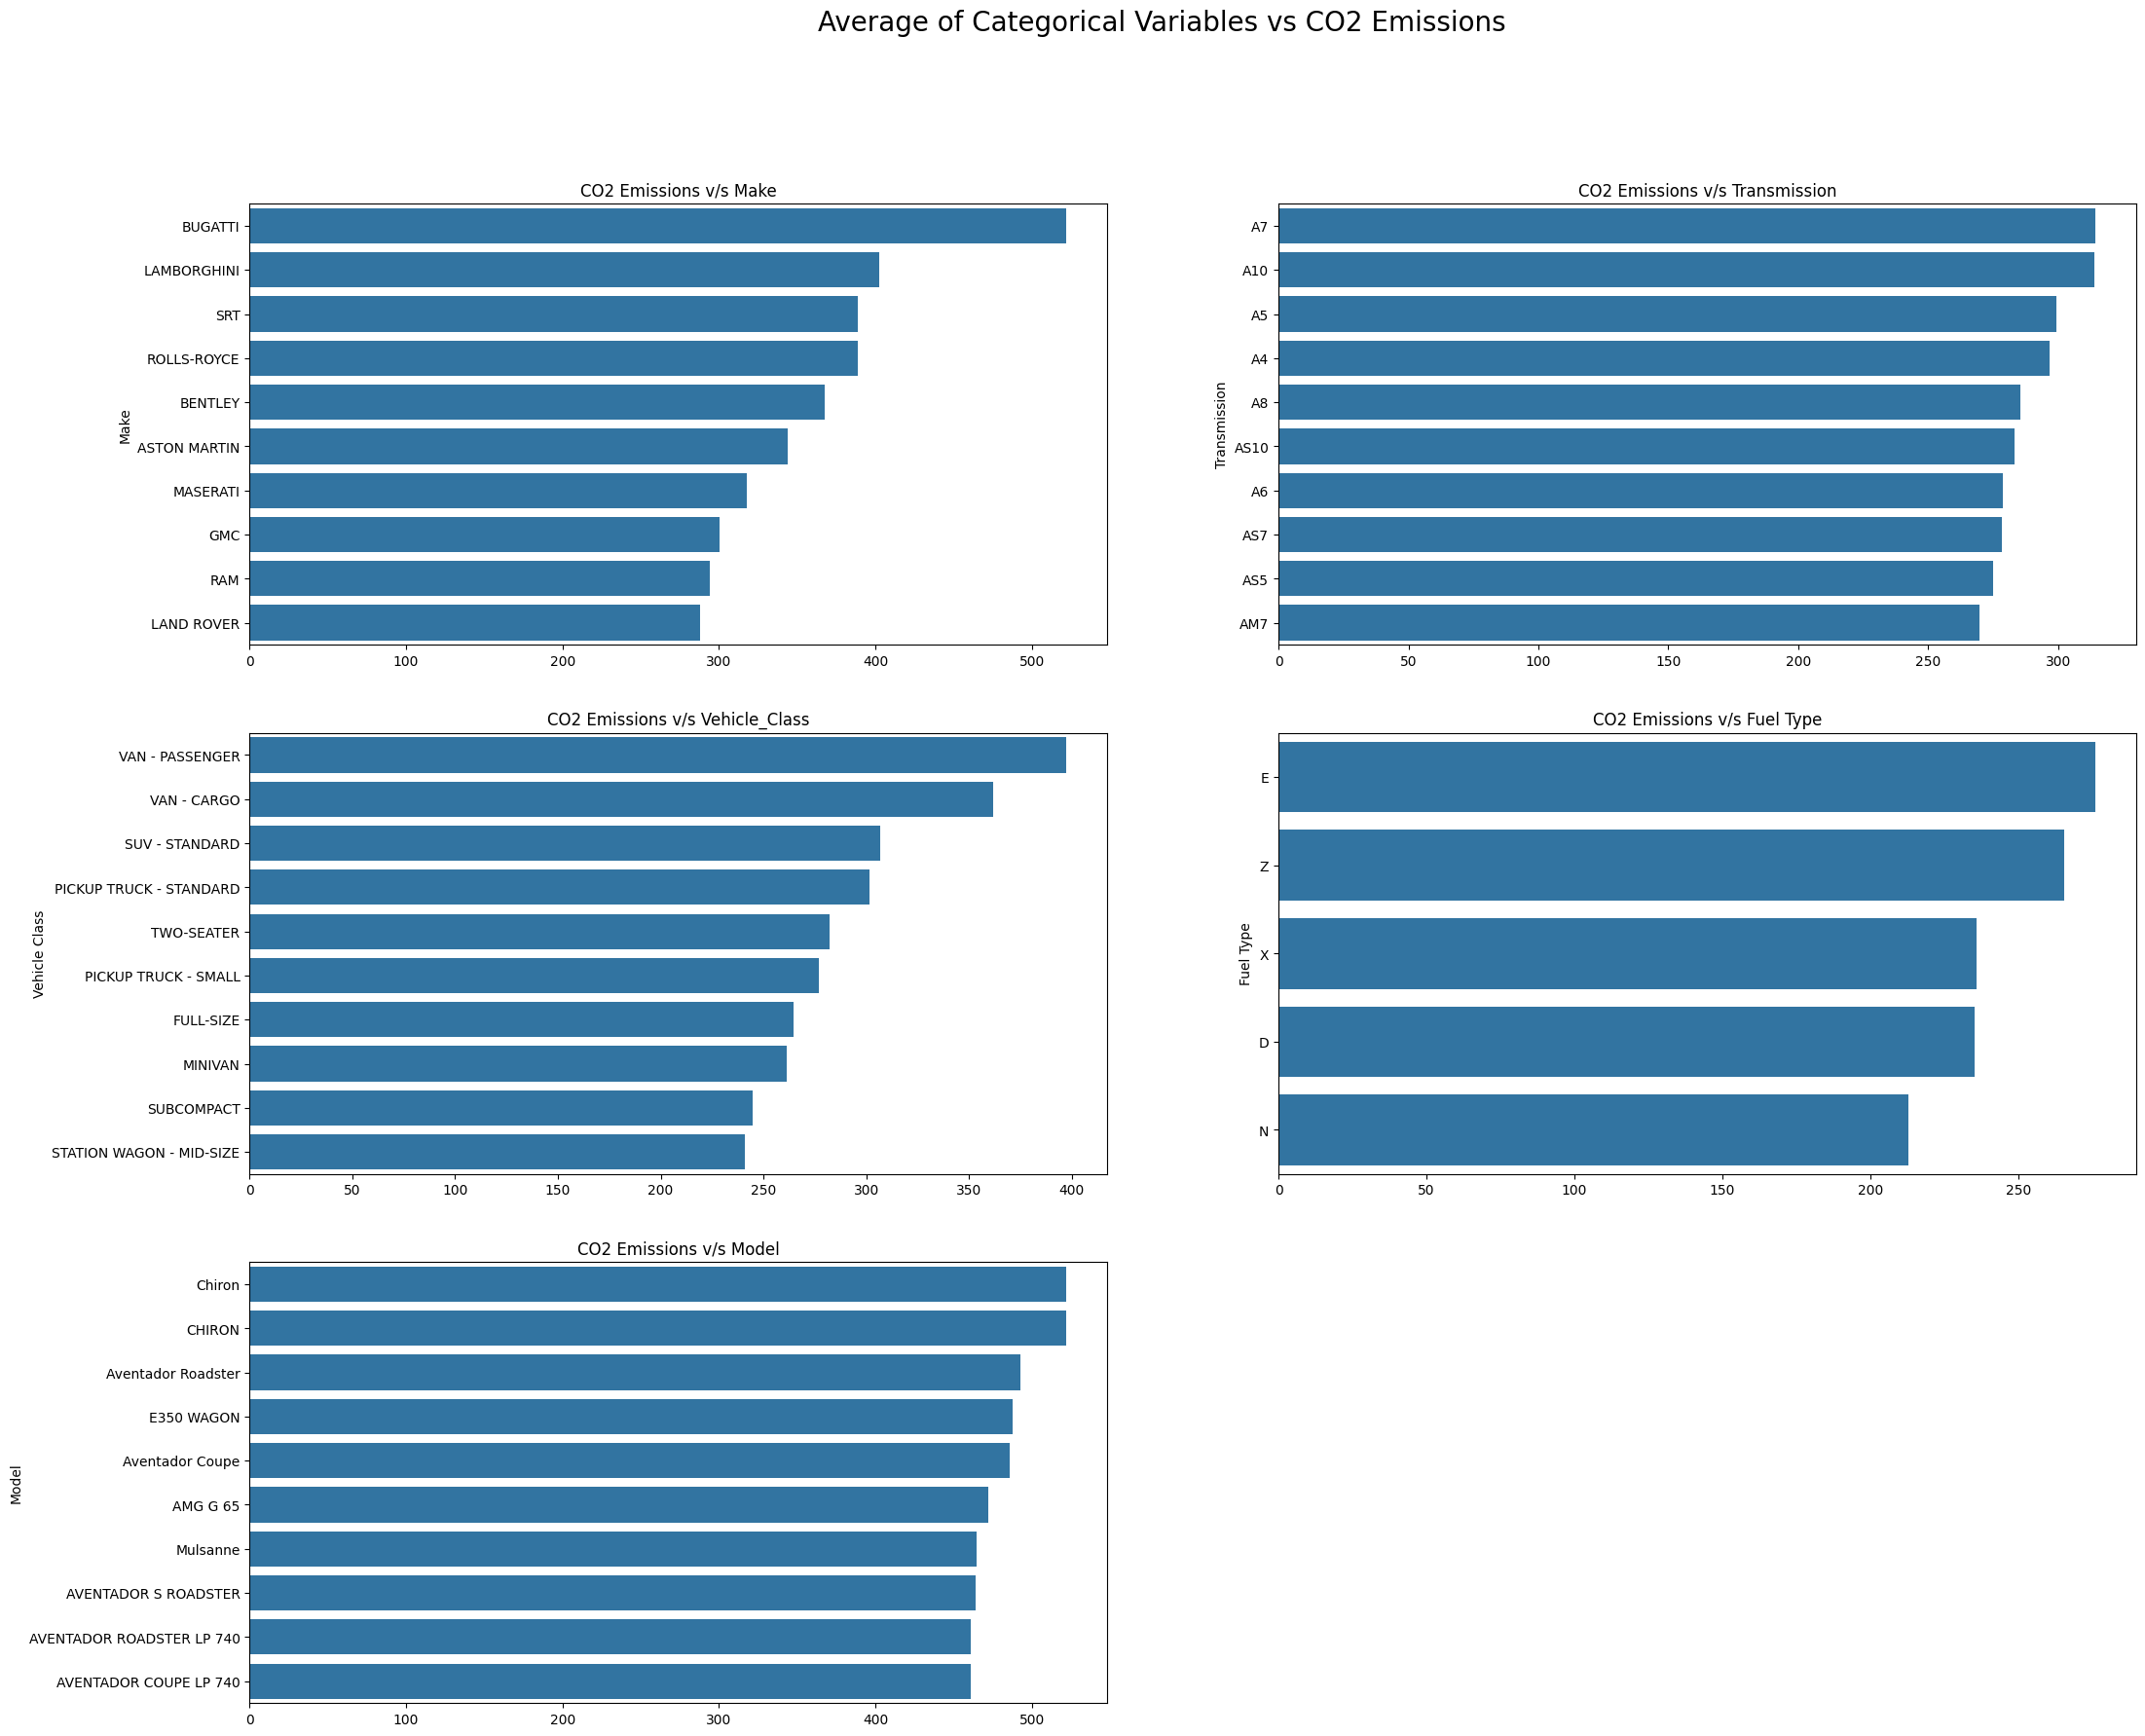

In [ ]:
fig, axes = plt.subplots(3,2, figsize=(25,20))
fig.suptitle('Average of Categorical Variables vs CO2 Emissions', size=20)

sns.barplot(ax=axes[0][0],x = make_co2.values,y = make_co2.index)
axes[0][0].set_title('CO2 Emissions v/s Make')

sns.barplot(ax=axes[0][1],x = transmission_co2.values,y = transmission_co2.index)
axes[0][1].set_title('CO2 Emissions v/s Transmission')

sns.barplot(ax=axes[1][0],x = vehicle_class_co2.values,y = vehicle_class_co2.index)
axes[1][0].set_title('CO2 Emissions v/s Vehicle_Class')

sns.barplot(ax=axes[1][1], x=fuel_type_co2.values,y=fuel_type_co2.index)
axes[1][1].set_title('CO2 Emissions v/s Fuel Type')

sns.barplot(ax=axes[2][0],x = model_co2.values,y = model_co2.index)
axes[2][0].set_title('CO2 Emissions v/s Model')
fig.delaxes(axes[2][1])
plt.show()

1. CO2 Emissions v/s Make: While Ford cars are mainly found on the roads of Canada , its Bugatti that emit the most CO2 per car
2. CO2 Emissions v/s Model: Bugatti Chiron is amongst the most CO2 emitting car model
3. CO2 Emissions v/s Vehicle_Class: Most of the heavy vehicles like Vans , SUV and Pick-up truck are amongst the top few emitters of CO2
4. CO2 Emissions v/s Transmission: Most of the cars with automatic transmission emit CO2
5. CO2 Emissions v/s Fuel_Type: Cars using Fuel Type E are emitting the most CO2

In [ ]:
df_num_features=data.select_dtypes(include=np.number)

In [ ]:
Q1 = df_num_features.quantile(0.25)
Q3 = df_num_features.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Engine Size(L)                       1.7
Cylinders                            2.0
Fuel Consumption City (L/100 km)     4.6
Fuel Consumption Hwy (L/100 km)      2.8
Fuel Consumption Comb (L/100 km)     3.8
Fuel Consumption Comb (mpg)         10.0
CO2 Emissions(g/km)                 81.0
dtype: float64


In [ ]:
outlier = pd.DataFrame((df_num_features < (Q1 - 1.5 * IQR)) | (df_num_features > (Q3 + 1.5 * IQR)))

for i in outlier.columns:
    print('Total number of Outliers in column {} are {}'.format(i, (len(outlier[outlier[i] == True][i]))))

Total number of Outliers in column Engine Size(L) are 121
Total number of Outliers in column Cylinders are 177
Total number of Outliers in column Fuel Consumption City (L/100 km) are 116
Total number of Outliers in column Fuel Consumption Hwy (L/100 km) are 150
Total number of Outliers in column Fuel Consumption Comb (L/100 km) are 115
Total number of Outliers in column Fuel Consumption Comb (mpg) are 95
Total number of Outliers in column CO2 Emissions(g/km) are 74


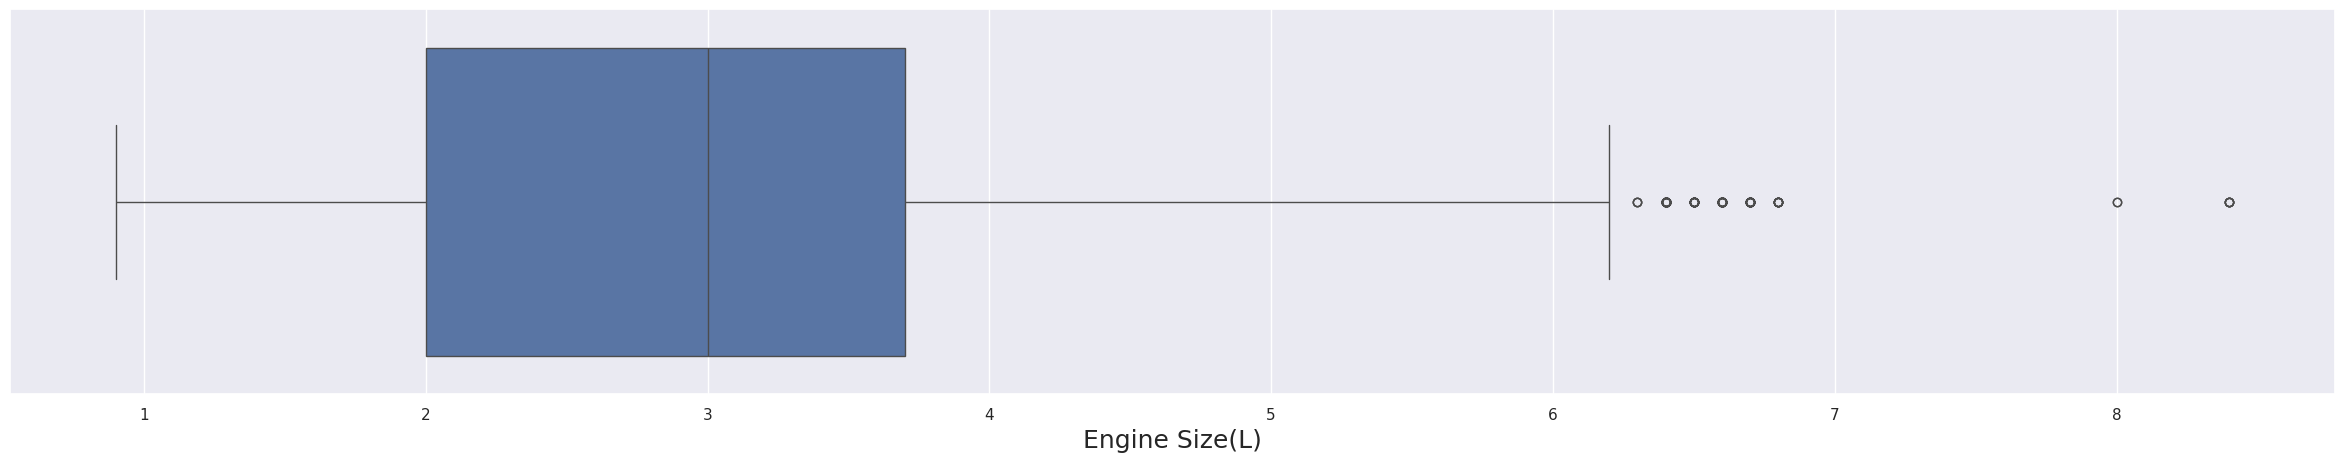

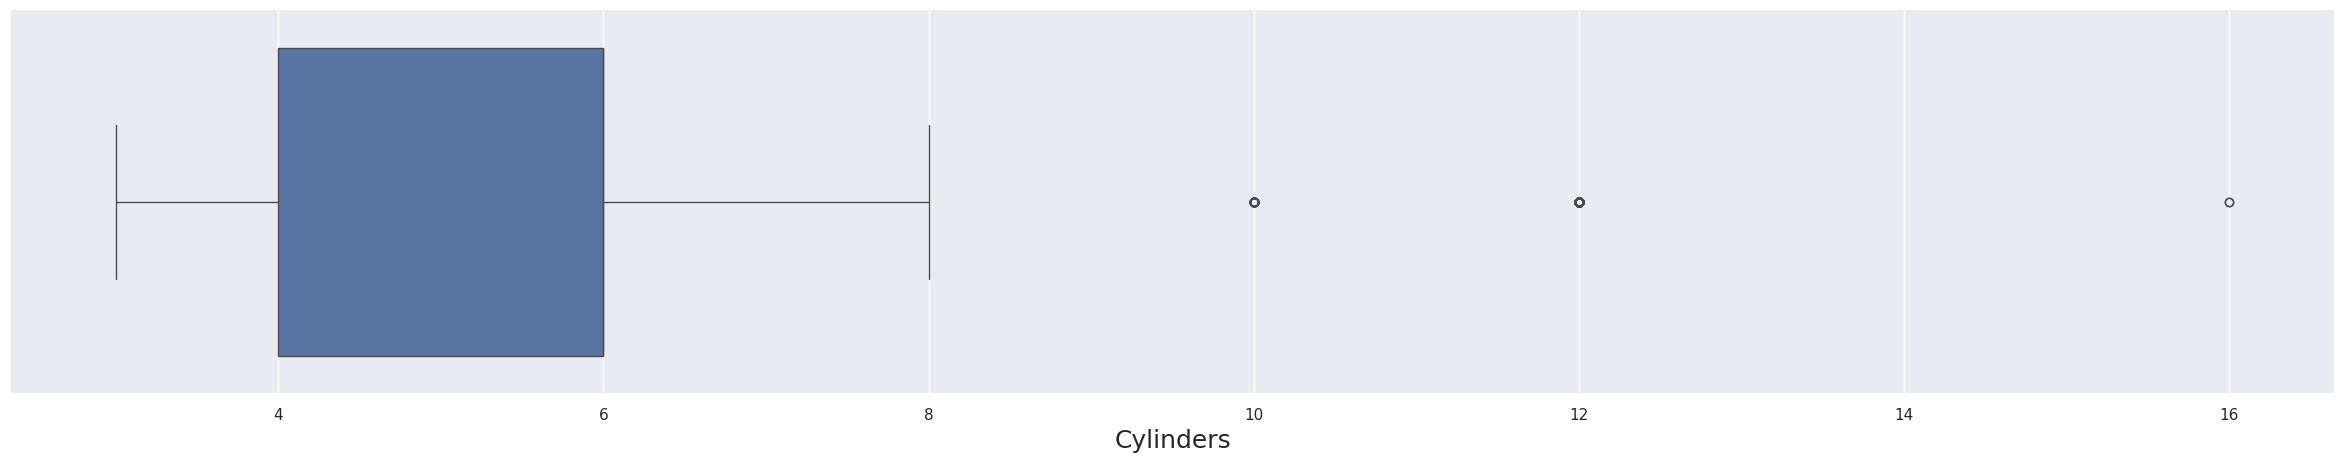

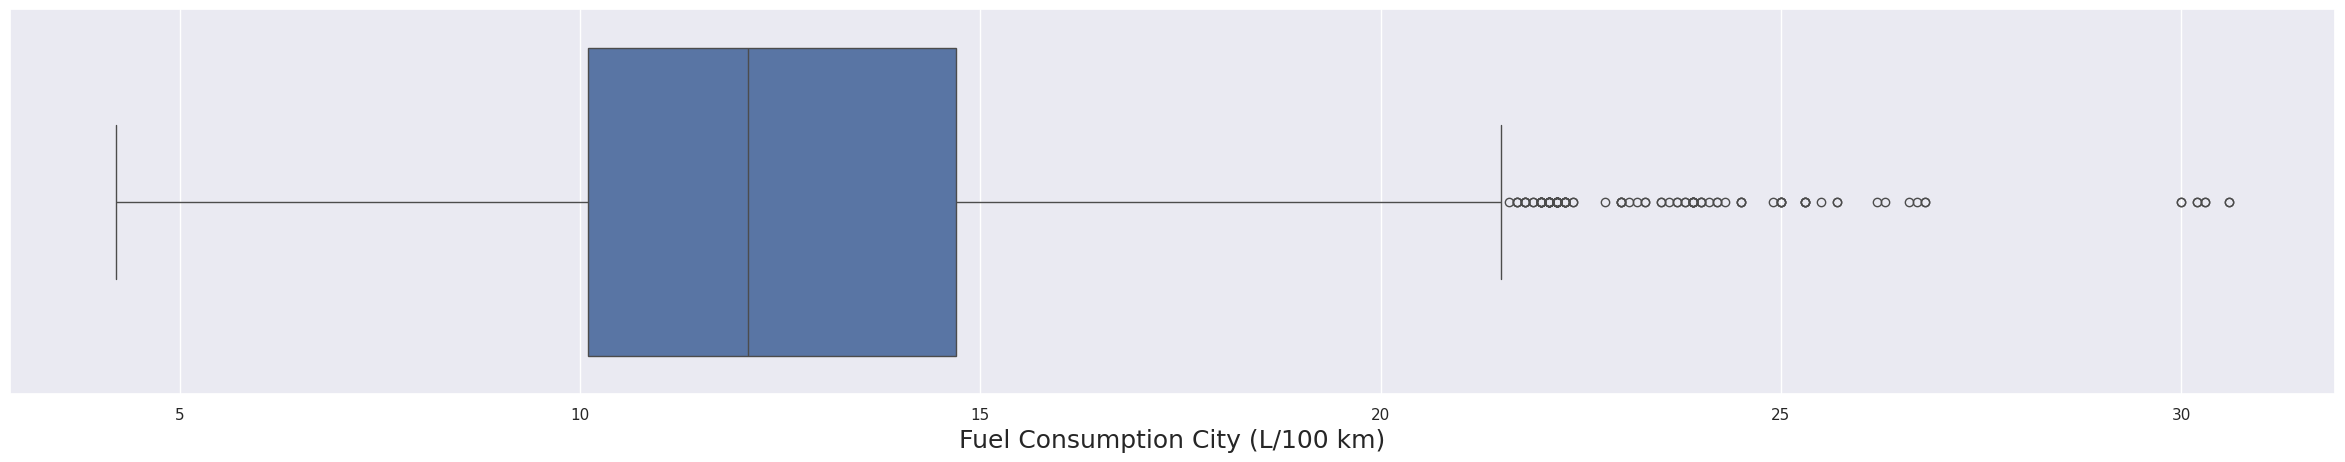

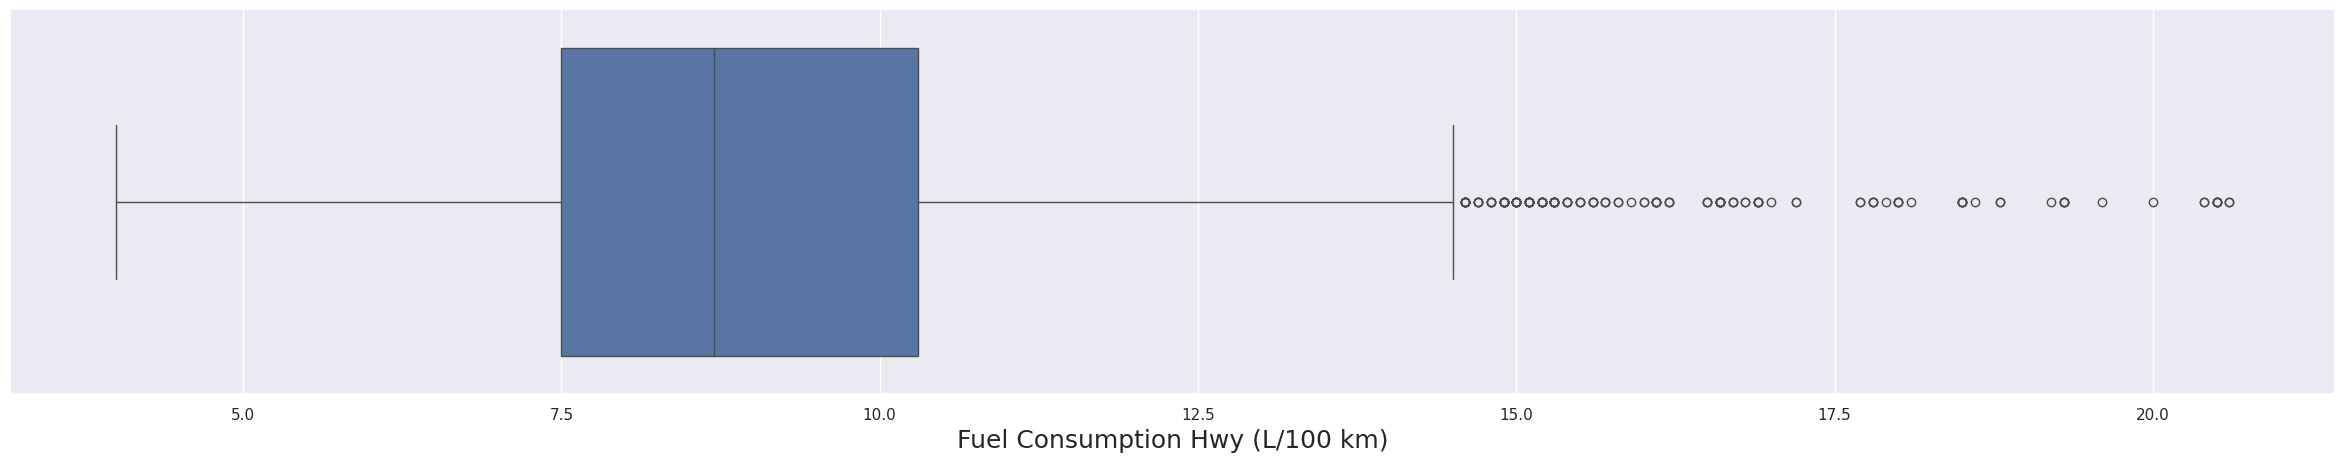

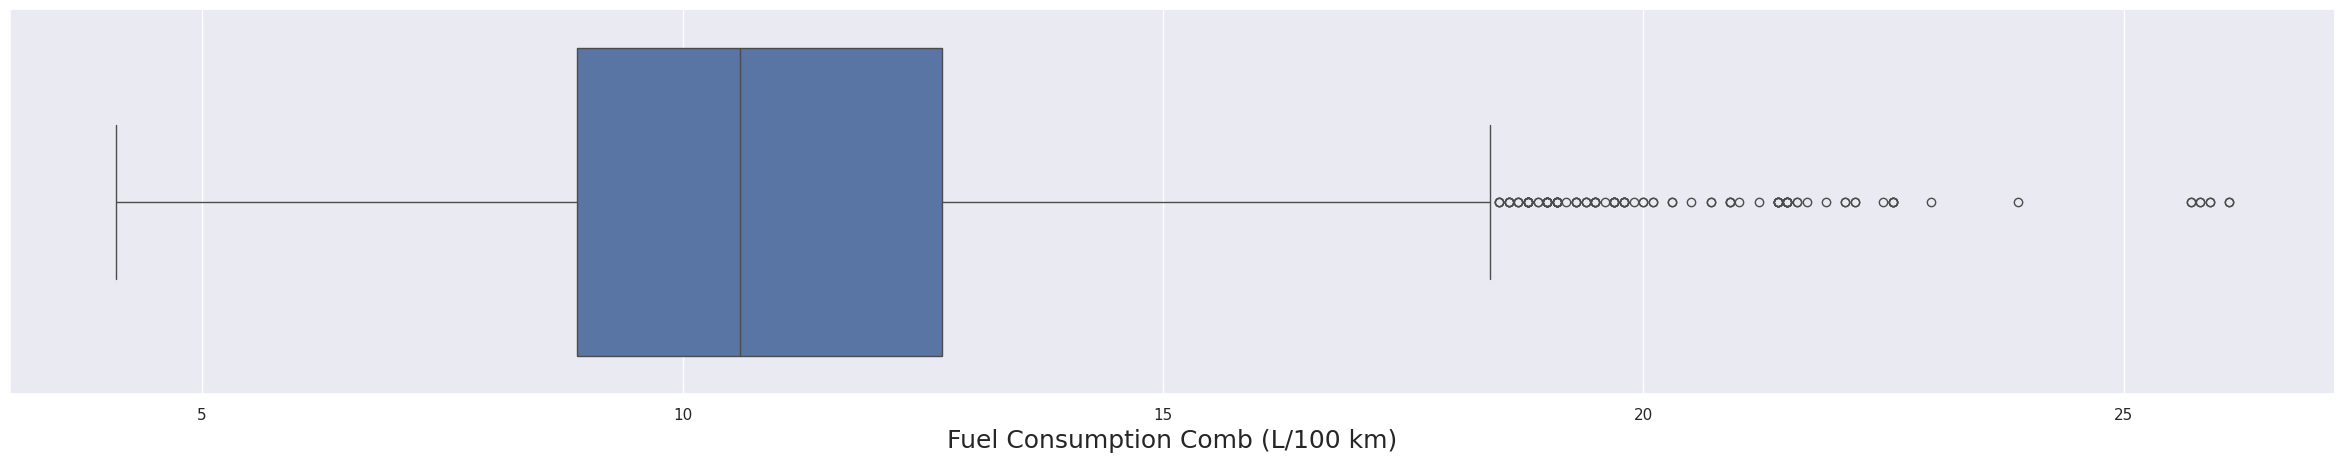

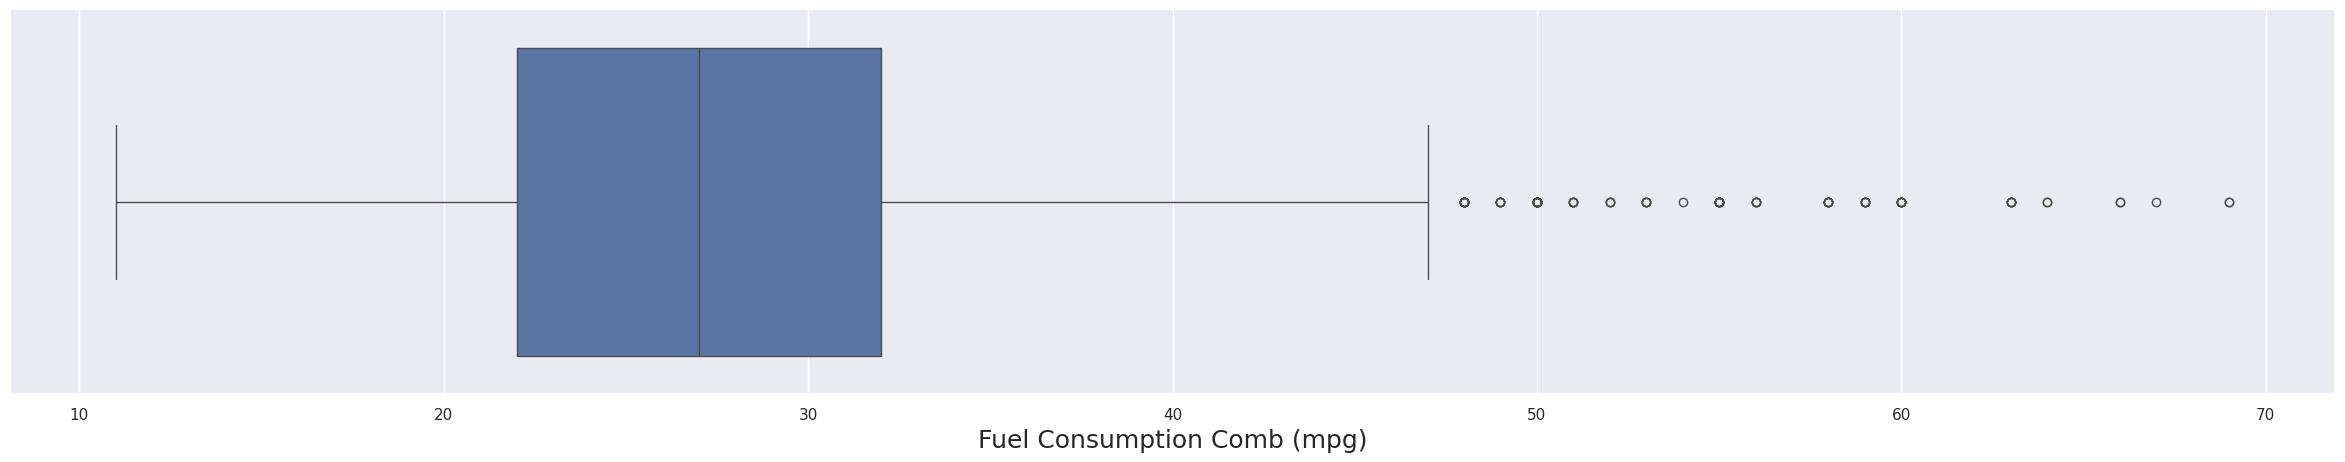

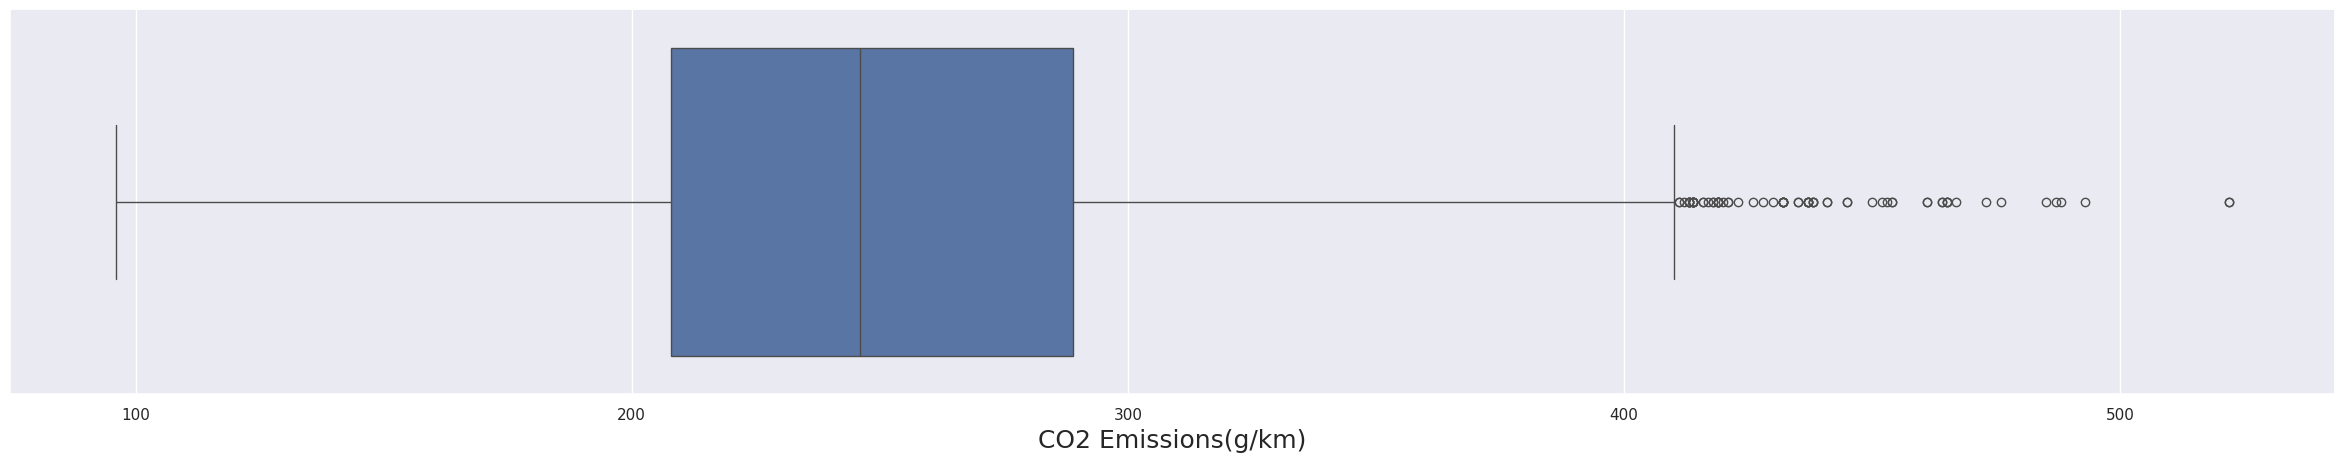

In [ ]:
for column in enumerate(df_num_features):
    plt.figure(figsize=(30,5))
    sns.set_theme(style="darkgrid")
    sns.boxplot(x=column[1], data=  df_num_features)
    plt.xlabel(column[1],fontsize=18)
    plt.show()

In [ ]:
from scipy.stats import shapiro
stat, p_value = shapiro(df_num_features)

print('Test statistic:', stat)
print('P-Value:', p_value)

Test statistic: 0.5185014597911467
P-Value: 4.371807141727005e-137


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 43974.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
data_no_outliers = df_num_features[~((df_num_features < (Q1 - 1.5 * IQR)) | (df_num_features > (Q3 + 1.5 * IQR))).any(axis=1)]

# Reset the index after filtering
data_no_outliers.reset_index(inplace=True, drop=True)

# Display the filtered DataFrame
data=data_no_outliers
data




,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,3.5,6,12.7,9.1,11.1,25,255
3,3.5,6,12.1,8.7,10.6,27,244
4,3.5,6,11.9,7.7,10.0,28,230
...,...,...,...,...,...,...,...
5811,2.0,4,10.7,7.7,9.4,30,219
5812,2.0,4,11.2,8.3,9.9,29,232
5813,2.0,4,11.7,8.6,10.3,27,240
5814,2.0,4,11.2,8.3,9.9,29,232


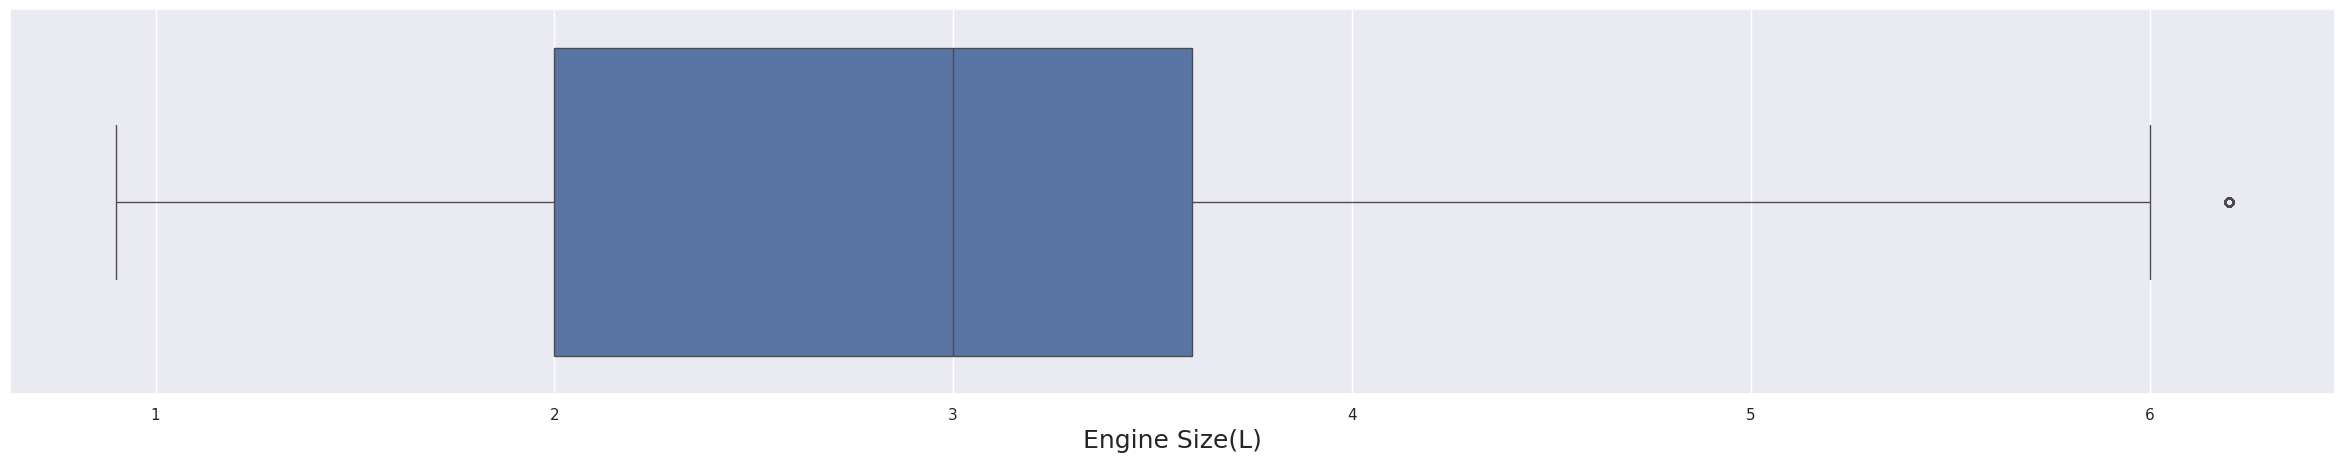

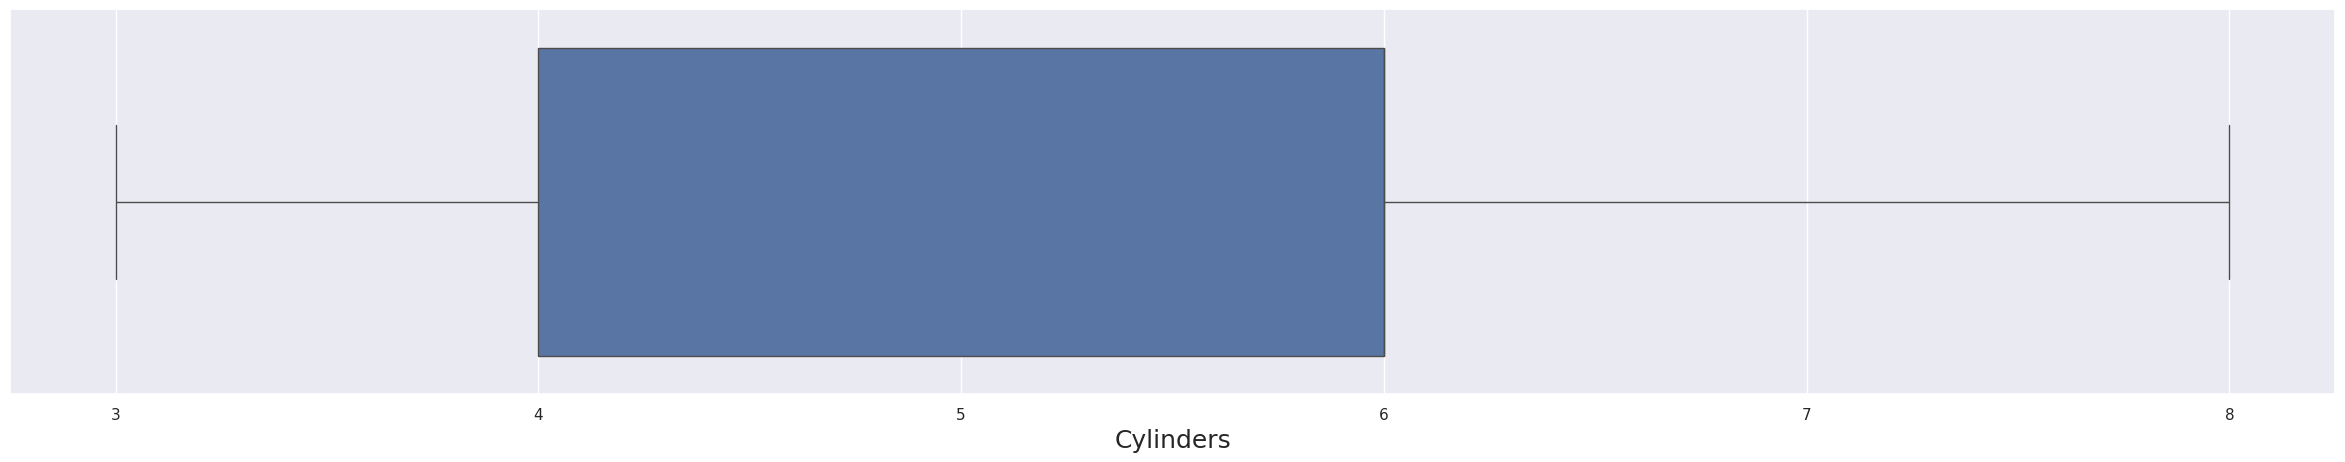

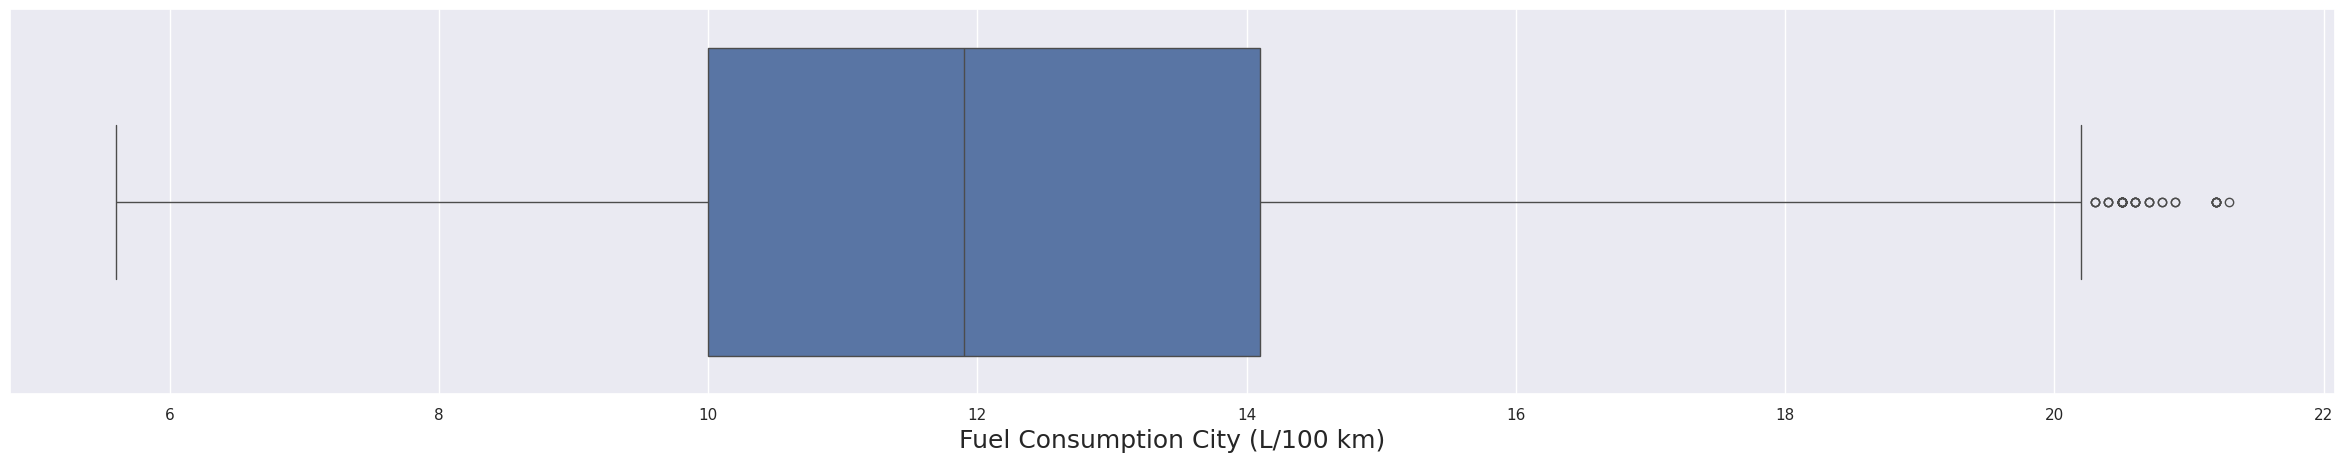

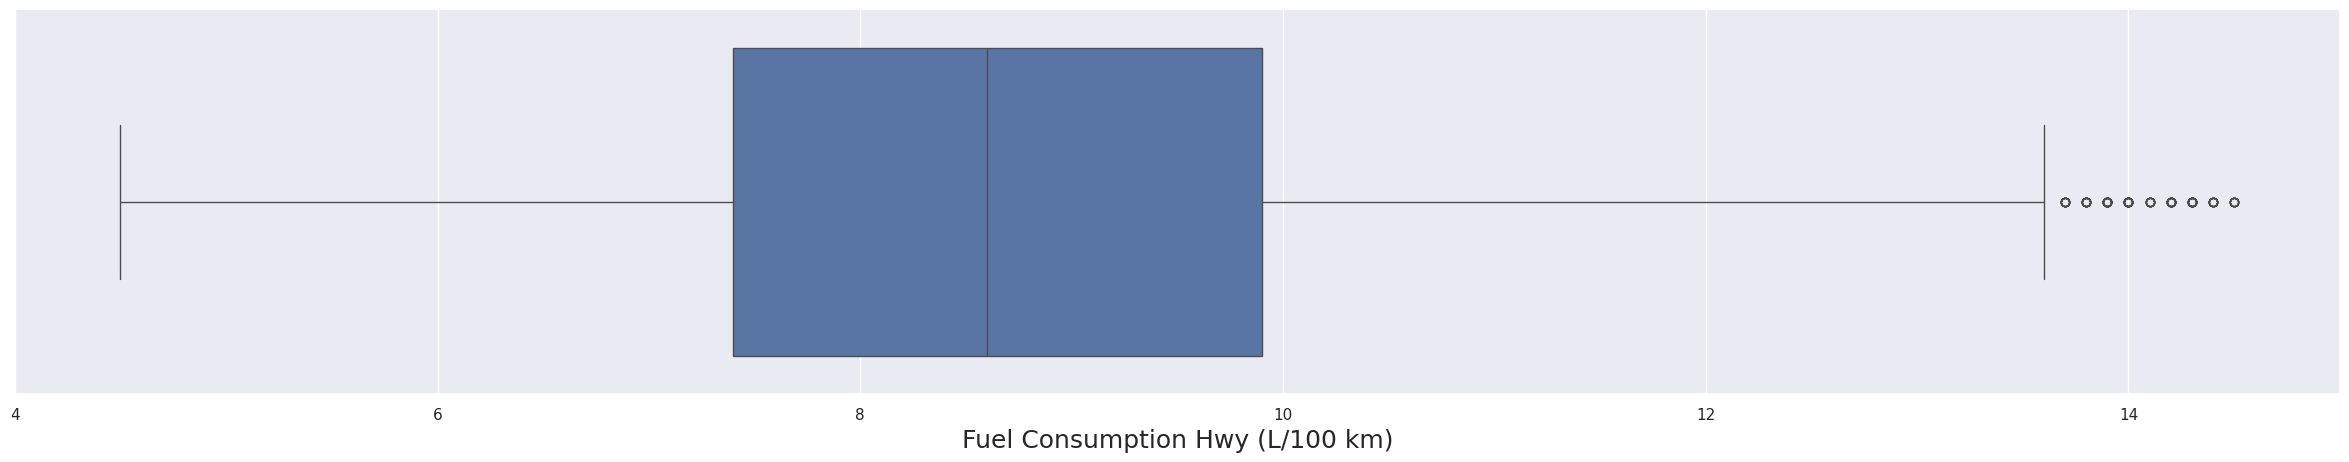

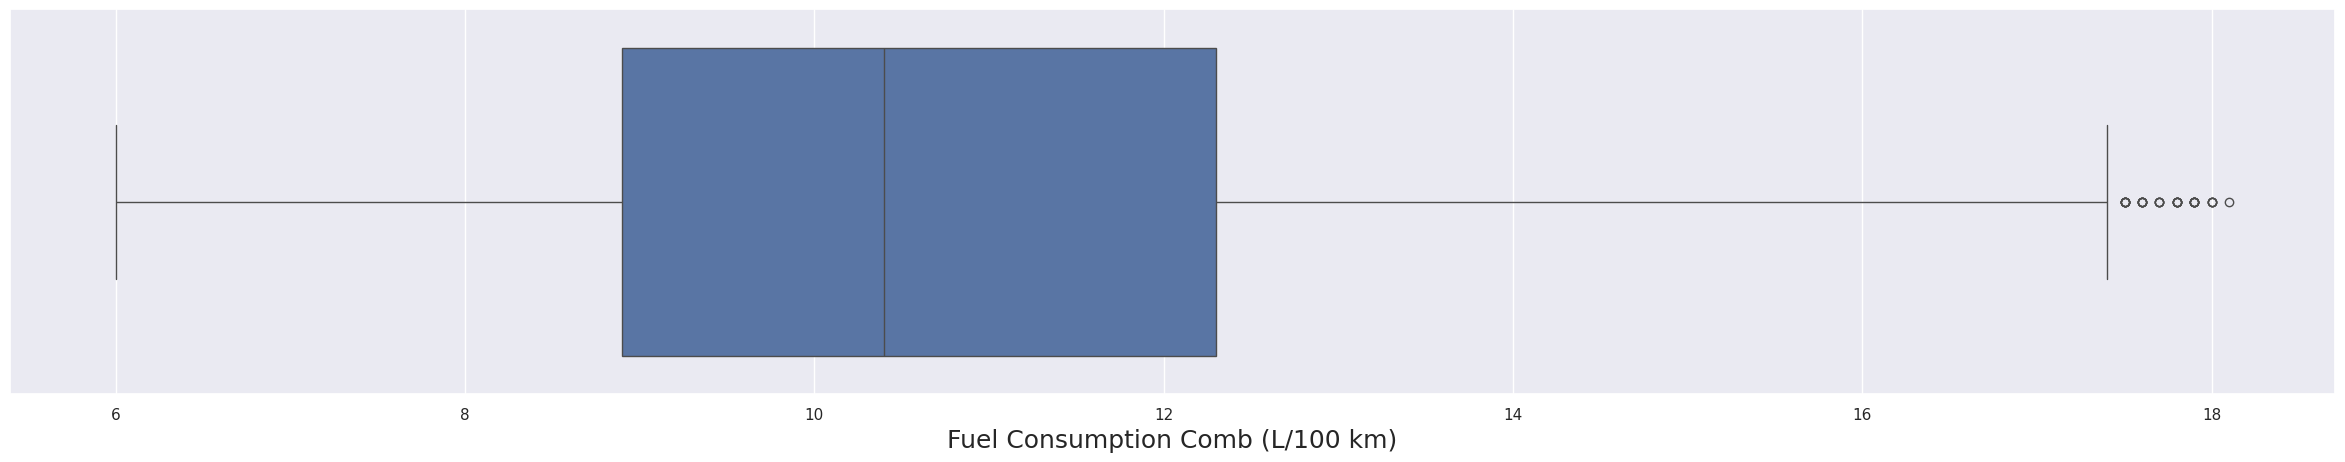

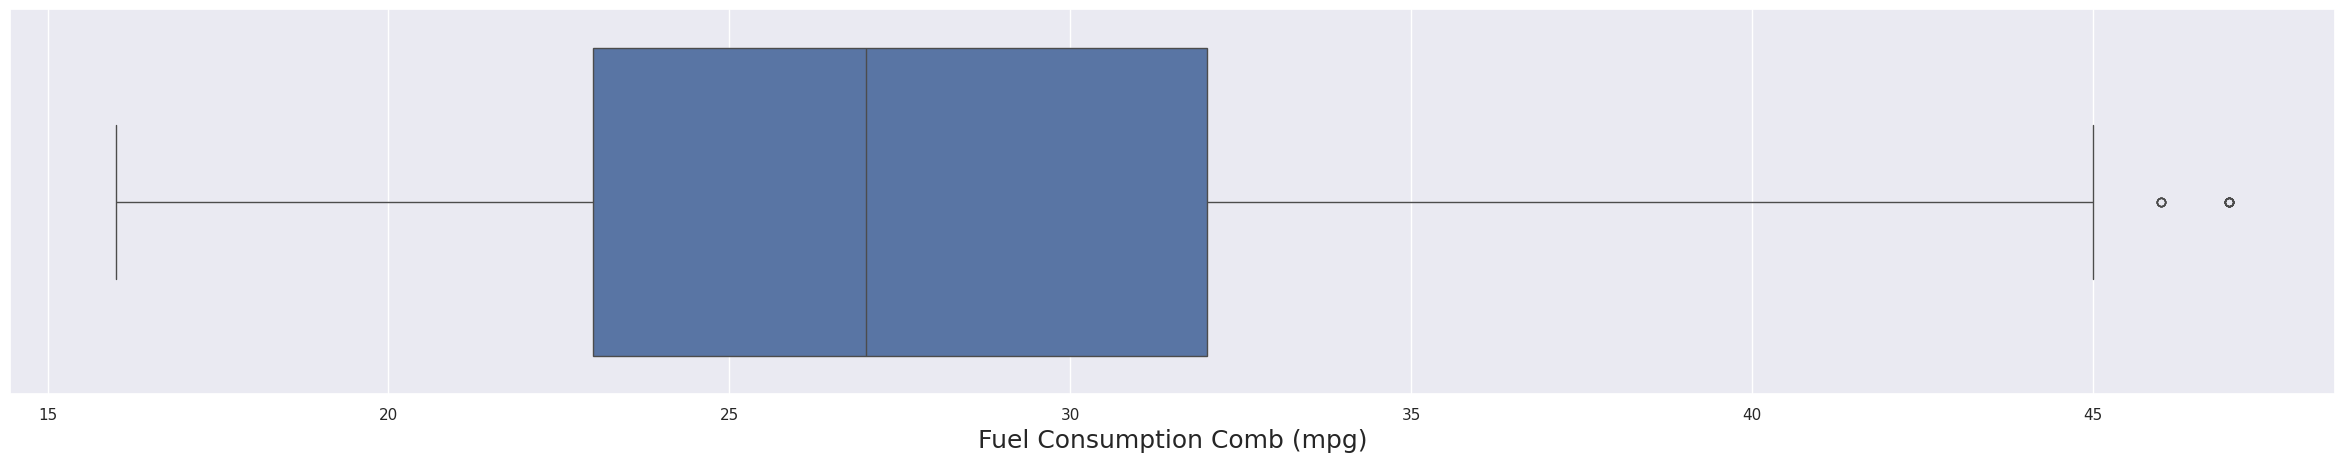

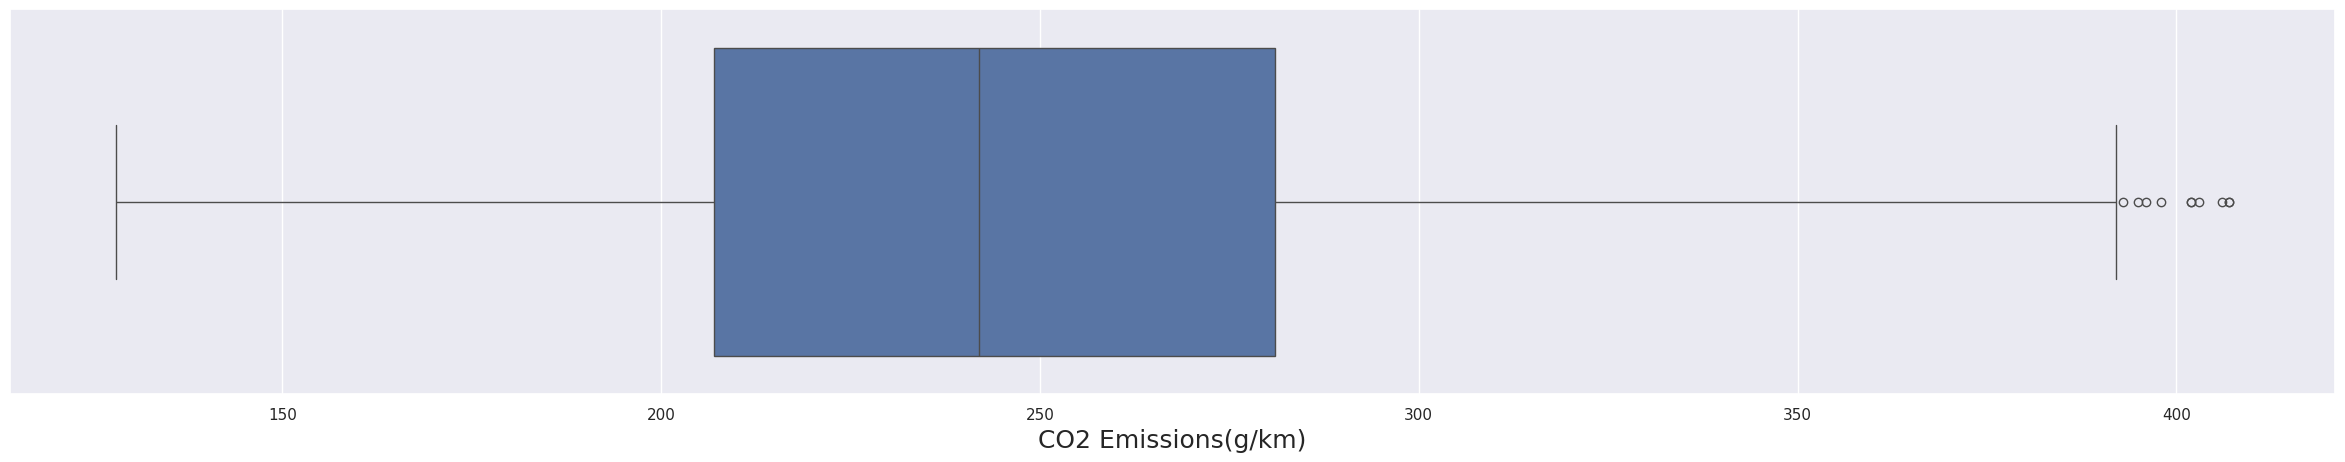

In [ ]:
for column in enumerate(df_num_features):
    plt.figure(figsize=(30,5))
    sns.set_theme(style="darkgrid")
    sns.boxplot(x=column[1], data=data)
    plt.xlabel(column[1],fontsize=18)
    plt.show()

In [ ]:
data.shape

(5816, 7)